In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import pandas_profiling as pdp
import scipy.stats as stats
from exploration_utils.plot_utils import category_count_per_label_subplots

%matplotlib inline


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
plt.style.use('dark_background')

In [5]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [6]:
# Reading the whole file is extremely slow
# train_df= pd.read_csv(r'/home/raz1/Desktop/DS/Projects/MicrosoftChallenge/microsoft-malware-prediction/train.csv',
#                       dtype = dtypes)

traindf = pd.read_csv(
         r'/home/raz1/DS Projects/MicrosoftChallenge/data/train.csv',
         dtype = dtypes,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > 0.005
)


In [7]:
# profie = pdp.ProfileReport(traindf)
# 
# profie
# 
# profie_detections = pdp.ProfileReport(traindf[traindf.HasDetections == 1][['SmartScreen']])
# profile_nodetections = pdp.ProfileReport(traindf[traindf.HasDetections == 0][['SmartScreen']])

In [8]:
yellow_features = ['OsVer',
'OsBuild',
'OsSuite',
'OsPlatformSubRelease',
'OsBuildLab',
'SkuEdition',
'Census_OSVersion',
'Census_OSBuildNumber',
'Census_OSBuildRevision',
'Census_OSEdition',
'Census_OSSkuName']

In [9]:
traindf['SkuEdition'].unique()

[Pro, Home, Invalid, Education, Cloud, Enterprise, Enterprise LTSB, Server]
Categories (8, object): [Pro, Home, Invalid, Education, Cloud, Enterprise, Enterprise LTSB, Server]

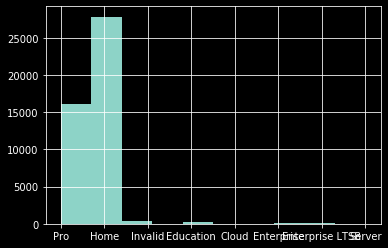

In [10]:
traindf['SkuEdition'].hist()

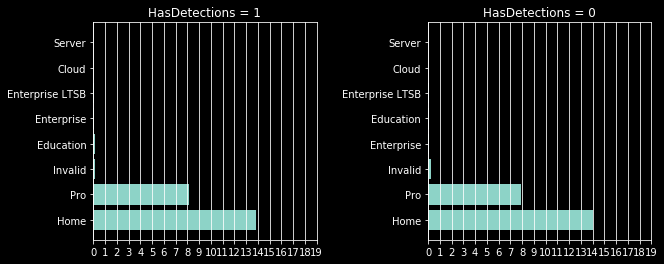

In [11]:
ticks=[1000*i for i in range(20)]
ticklabels=[i for i in range(20)]
category_count_per_label_subplots(df=traindf, category_feature_name='SkuEdition', 
                                             label_feature_name='HasDetections',
                                             nrows=1, ncols=2, figsize=(10,4), wspace=0.5, 
                                             ticks=ticks, ticklabels=ticklabels)

In [12]:
traindf['SkuHome'] = (traindf['SkuEdition'] == 'Home')*1

In [13]:
stats.ttest_ind(traindf[traindf['HasDetections'] == 0].SkuHome,traindf[traindf['HasDetections'] == 1].SkuHome)

Ttest_indResult(statistic=1.2857898802301122, pvalue=0.19852304387711356)

In [14]:
yellow_features.remove('SkuEdition')
yellow_features.append('SkuHome')

In [15]:
corrs = traindf[yellow_features].corr()

In [16]:
traindf[['OsBuild','Census_OSBuildNumber']].corr()

,OsBuild,Census_OSBuildNumber
OsBuild,1.000000,0.937349
Census_OSBuildNumber,0.937349,1.000000


In [17]:
traindf[['OsBuild','Census_OSBuildNumber']].plot(kind='scatter')

ValueError: scatter requires an x and y column